In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from flask import Flask, render_template

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
#finding column names in Measurement table
first_row_M = session.query(Measurement).first()
first_row_M.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x93db550>,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08}

In [11]:
#finding column names Station table
first_row_S = session.query(Station).first()
first_row_S.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x93e71d0>,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [12]:
#finding most recent date for next problem
for row in session.query(Measurement.prcp, Measurement.date).order_by(Measurement.date):
    print(row)

(0.08, '2010-01-01')
(0.28, '2010-01-01')
(0.21, '2010-01-01')
(0.15, '2010-01-01')
(0.15, '2010-01-01')
(0.05, '2010-01-01')
(0.14, '2010-01-01')
(0.0, '2010-01-02')
(0.0, '2010-01-02')
(0.02, '2010-01-02')
(0.0, '2010-01-02')
(0.0, '2010-01-02')
(0.0, '2010-01-02')
(0.0, '2010-01-02')
(0.0, '2010-01-03')
(0.0, '2010-01-03')
(0.0, '2010-01-03')
(0.0, '2010-01-03')
(0.0, '2010-01-03')
(0.0, '2010-01-03')
(0.0, '2010-01-03')
(0.0, '2010-01-04')
(0.0, '2010-01-04')
(0.01, '2010-01-04')
(0.0, '2010-01-04')
(0.0, '2010-01-04')
(0.0, '2010-01-04')
(0.0, '2010-01-04')
(0.0, '2010-01-05')
(0.02, '2010-01-05')
(0.01, '2010-01-05')
(0.0, '2010-01-05')
(0.0, '2010-01-05')
(0.0, '2010-01-05')
(None, '2010-01-06')
(0.02, '2010-01-06')
(0.11, '2010-01-06')
(0.01, '2010-01-06')
(0.08, '2010-01-06')
(0.36, '2010-01-06')
(0.06, '2010-01-07')
(0.38, '2010-01-07')
(None, '2010-01-07')
(0.7, '2010-01-07')
(0.17, '2010-01-07')
(0.04, '2010-01-07')
(0.3, '2010-01-07')
(0.0, '2010-01-08')
(0.01, '2010-01-08

(0.0, '2010-05-11')
(0.06, '2010-05-11')
(0.0, '2010-05-11')
(0.01, '2010-05-12')
(0.03, '2010-05-12')
(0.0, '2010-05-12')
(0.06, '2010-05-12')
(0.08, '2010-05-12')
(0.02, '2010-05-12')
(0.0, '2010-05-12')
(None, '2010-05-12')
(0.0, '2010-05-13')
(0.01, '2010-05-13')
(0.02, '2010-05-13')
(None, '2010-05-13')
(0.04, '2010-05-13')
(0.06, '2010-05-13')
(0.0, '2010-05-13')
(0.32, '2010-05-13')
(0.0, '2010-05-14')
(0.0, '2010-05-14')
(0.0, '2010-05-14')
(0.0, '2010-05-14')
(0.02, '2010-05-14')
(0.0, '2010-05-14')
(0.0, '2010-05-14')
(0.0, '2010-05-14')
(0.0, '2010-05-14')
(0.0, '2010-05-15')
(0.06, '2010-05-15')
(0.1, '2010-05-15')
(0.05, '2010-05-15')
(0.14, '2010-05-15')
(0.0, '2010-05-15')
(0.25, '2010-05-15')
(0.03, '2010-05-16')
(0.1, '2010-05-16')
(0.0, '2010-05-16')
(0.06, '2010-05-16')
(0.13, '2010-05-16')
(0.02, '2010-05-16')
(0.61, '2010-05-16')
(0.0, '2010-05-17')
(0.0, '2010-05-17')
(0.0, '2010-05-17')
(None, '2010-05-17')
(0.03, '2010-05-17')
(0.03, '2010-05-17')
(0.01, '2010-0

(0.0, '2010-09-13')
(0.0, '2010-09-13')
(0.0, '2010-09-14')
(0.01, '2010-09-14')
(0.04, '2010-09-14')
(0.0, '2010-09-14')
(0.0, '2010-09-14')
(0.0, '2010-09-14')
(0.06, '2010-09-14')
(0.0, '2010-09-14')
(0.27, '2010-09-14')
(0.0, '2010-09-15')
(0.0, '2010-09-15')
(0.01, '2010-09-15')
(0.0, '2010-09-15')
(0.0, '2010-09-15')
(0.0, '2010-09-15')
(0.02, '2010-09-15')
(0.0, '2010-09-15')
(0.04, '2010-09-15')
(0.0, '2010-09-16')
(0.01, '2010-09-16')
(0.02, '2010-09-16')
(0.02, '2010-09-16')
(0.01, '2010-09-16')
(0.0, '2010-09-16')
(0.0, '2010-09-16')
(0.0, '2010-09-16')
(0.21, '2010-09-16')
(0.0, '2010-09-17')
(0.0, '2010-09-17')
(0.03, '2010-09-17')
(0.0, '2010-09-17')
(0.0, '2010-09-17')
(0.0, '2010-09-17')
(0.0, '2010-09-17')
(0.0, '2010-09-17')
(0.0, '2010-09-17')
(0.03, '2010-09-18')
(0.0, '2010-09-18')
(0.03, '2010-09-18')
(0.01, '2010-09-18')
(0.04, '2010-09-18')
(0.0, '2010-09-18')
(0.19, '2010-09-18')
(0.0, '2010-09-19')
(0.08, '2010-09-19')
(0.06, '2010-09-19')
(0.07, '2010-09-19')

(0.01, '2010-11-14')
(0.0, '2010-11-14')
(0.01, '2010-11-14')
(0.0, '2010-11-14')
(0.31, '2010-11-14')
(0.35, '2010-11-15')
(0.08, '2010-11-15')
(None, '2010-11-15')
(None, '2010-11-15')
(0.03, '2010-11-15')
(0.85, '2010-11-15')
(0.01, '2010-11-15')
(0.6, '2010-11-15')
(0.0, '2010-11-16')
(0.01, '2010-11-16')
(0.0, '2010-11-16')
(0.02, '2010-11-16')
(0.08, '2010-11-16')
(0.0, '2010-11-16')
(0.13, '2010-11-16')
(0.04, '2010-11-16')
(0.62, '2010-11-16')
(0.0, '2010-11-17')
(0.0, '2010-11-17')
(0.0, '2010-11-17')
(0.0, '2010-11-17')
(0.0, '2010-11-17')
(0.0, '2010-11-17')
(0.02, '2010-11-17')
(0.01, '2010-11-17')
(0.0, '2010-11-18')
(0.0, '2010-11-18')
(0.0, '2010-11-18')
(0.0, '2010-11-18')
(0.0, '2010-11-18')
(0.0, '2010-11-18')
(0.0, '2010-11-18')
(0.0, '2010-11-18')
(None, '2010-11-19')
(0.19, '2010-11-19')
(0.16, '2010-11-19')
(0.35, '2010-11-19')
(0.35, '2010-11-19')
(0.13, '2010-11-19')
(0.19, '2010-11-19')
(0.34, '2010-11-19')
(0.22, '2010-11-19')
(0.03, '2010-11-20')
(0.02, '2010

(0.0, '2011-01-18')
(0.0, '2011-01-18')
(0.0, '2011-01-18')
(0.0, '2011-01-18')
(0.03, '2011-01-19')
(0.05, '2011-01-19')
(0.07, '2011-01-19')
(0.0, '2011-01-19')
(0.03, '2011-01-19')
(0.07, '2011-01-19')
(0.07, '2011-01-19')
(0.01, '2011-01-19')
(0.03, '2011-01-19')
(0.0, '2011-01-20')
(0.01, '2011-01-20')
(0.03, '2011-01-20')
(0.03, '2011-01-20')
(0.07, '2011-01-20')
(0.0, '2011-01-20')
(0.1, '2011-01-20')
(0.0, '2011-01-20')
(0.01, '2011-01-20')
(0.0, '2011-01-21')
(0.01, '2011-01-21')
(0.1, '2011-01-21')
(0.02, '2011-01-21')
(0.0, '2011-01-21')
(0.0, '2011-01-21')
(0.04, '2011-01-21')
(0.0, '2011-01-21')
(0.43, '2011-01-21')
(0.0, '2011-01-22')
(0.0, '2011-01-22')
(0.0, '2011-01-22')
(0.0, '2011-01-22')
(0.0, '2011-01-22')
(0.0, '2011-01-22')
(0.02, '2011-01-22')
(0.0, '2011-01-23')
(0.0, '2011-01-23')
(0.0, '2011-01-23')
(0.0, '2011-01-23')
(0.0, '2011-01-23')
(0.0, '2011-01-23')
(0.19, '2011-01-23')
(0.0, '2011-01-24')
(0.01, '2011-01-24')
(0.0, '2011-01-24')
(0.0, '2011-01-24')


(0.0, '2011-05-25')
(0.01, '2011-05-25')
(0.0, '2011-05-25')
(0.09, '2011-05-25')
(0.0, '2011-05-26')
(0.0, '2011-05-26')
(0.02, '2011-05-26')
(0.0, '2011-05-26')
(0.0, '2011-05-26')
(0.01, '2011-05-26')
(0.0, '2011-05-26')
(0.0, '2011-05-26')
(0.0, '2011-05-27')
(0.03, '2011-05-27')
(0.09, '2011-05-27')
(0.01, '2011-05-27')
(0.1, '2011-05-27')
(0.23, '2011-05-27')
(0.0, '2011-05-27')
(0.09, '2011-05-27')
(0.0, '2011-05-28')
(0.02, '2011-05-28')
(0.01, '2011-05-28')
(0.03, '2011-05-28')
(0.0, '2011-05-28')
(0.01, '2011-05-28')
(0.0, '2011-05-29')
(0.1, '2011-05-29')
(None, '2011-05-29')
(0.03, '2011-05-29')
(0.08, '2011-05-29')
(0.0, '2011-05-29')
(0.17, '2011-05-29')
(0.0, '2011-05-30')
(0.0, '2011-05-30')
(0.01, '2011-05-30')
(0.02, '2011-05-30')
(0.0, '2011-05-30')
(0.16, '2011-05-30')
(0.05, '2011-05-31')
(0.0, '2011-05-31')
(0.0, '2011-05-31')
(0.0, '2011-05-31')
(0.08, '2011-05-31')
(0.01, '2011-05-31')
(0.0, '2011-05-31')
(0.15, '2011-05-31')
(0.07, '2011-06-01')
(0.03, '2011-06

(0.03, '2011-10-11')
(0.04, '2011-10-11')
(0.07, '2011-10-11')
(0.0, '2011-10-11')
(0.14, '2011-10-11')
(0.08, '2011-10-11')
(0.01, '2011-10-11')
(0.0, '2011-10-12')
(0.0, '2011-10-12')
(0.01, '2011-10-12')
(0.0, '2011-10-12')
(0.0, '2011-10-12')
(0.01, '2011-10-12')
(0.0, '2011-10-12')
(0.0, '2011-10-13')
(0.11, '2011-10-13')
(0.11, '2011-10-13')
(0.0, '2011-10-13')
(0.0, '2011-10-13')
(0.06, '2011-10-13')
(0.0, '2011-10-13')
(None, '2011-10-13')
(0.03, '2011-10-14')
(0.06, '2011-10-14')
(0.01, '2011-10-14')
(0.08, '2011-10-14')
(0.07, '2011-10-14')
(0.01, '2011-10-14')
(0.0, '2011-10-14')
(0.57, '2011-10-14')
(0.02, '2011-10-15')
(0.15, '2011-10-15')
(0.08, '2011-10-15')
(0.26, '2011-10-15')
(0.22, '2011-10-15')
(0.01, '2011-10-15')
(1.72, '2011-10-15')
(0.0, '2011-10-16')
(0.0, '2011-10-16')
(0.0, '2011-10-16')
(0.06, '2011-10-16')
(0.0, '2011-10-16')
(0.0, '2011-10-16')
(0.02, '2011-10-17')
(0.03, '2011-10-17')
(0.0, '2011-10-17')
(0.0, '2011-10-17')
(0.2, '2011-10-17')
(0.0, '2011

(0.0, '2012-02-21')
(0.0, '2012-02-21')
(0.0, '2012-02-21')
(0.0, '2012-02-21')
(0.0, '2012-02-22')
(0.05, '2012-02-22')
(0.04, '2012-02-22')
(0.0, '2012-02-22')
(0.0, '2012-02-22')
(0.03, '2012-02-22')
(0.0, '2012-02-22')
(0.0, '2012-02-22')
(0.0, '2012-02-23')
(0.04, '2012-02-23')
(0.06, '2012-02-23')
(0.0, '2012-02-23')
(0.0, '2012-02-23')
(0.19, '2012-02-23')
(0.05, '2012-02-23')
(1.31, '2012-02-23')
(0.0, '2012-02-24')
(0.0, '2012-02-24')
(0.01, '2012-02-24')
(0.0, '2012-02-24')
(None, '2012-02-24')
(0.0, '2012-02-24')
(0.05, '2012-02-24')
(0.0, '2012-02-24')
(0.77, '2012-02-24')
(0.0, '2012-02-25')
(0.01, '2012-02-25')
(0.1, '2012-02-25')
(0.0, '2012-02-25')
(0.0, '2012-02-25')
(0.02, '2012-02-25')
(0.05, '2012-02-26')
(0.23, '2012-02-26')
(0.07, '2012-02-26')
(0.85, '2012-02-26')
(0.01, '2012-02-26')
(0.3, '2012-02-26')
(0.06, '2012-02-27')
(0.0, '2012-02-27')
(None, '2012-02-27')
(None, '2012-02-27')
(None, '2012-02-27')
(0.0, '2012-02-27')
(0.02, '2012-02-27')
(0.38, '2012-02-

(0.01, '2012-07-09')
(0.0, '2012-07-09')
(0.0, '2012-07-09')
(0.0, '2012-07-09')
(0.01, '2012-07-09')
(0.0, '2012-07-10')
(0.01, '2012-07-10')
(0.03, '2012-07-10')
(0.0, '2012-07-10')
(0.01, '2012-07-10')
(0.0, '2012-07-10')
(0.12, '2012-07-10')
(0.0, '2012-07-11')
(0.02, '2012-07-11')
(0.0, '2012-07-11')
(0.0, '2012-07-11')
(0.0, '2012-07-11')
(0.01, '2012-07-11')
(0.0, '2012-07-11')
(0.39, '2012-07-11')
(0.0, '2012-07-12')
(0.0, '2012-07-12')
(0.02, '2012-07-12')
(0.0, '2012-07-12')
(0.0, '2012-07-12')
(0.0, '2012-07-12')
(0.0, '2012-07-12')
(0.0, '2012-07-12')
(0.0, '2012-07-13')
(0.18, '2012-07-13')
(0.12, '2012-07-13')
(0.0, '2012-07-13')
(0.0, '2012-07-13')
(0.23, '2012-07-13')
(0.0, '2012-07-13')
(0.52, '2012-07-13')
(0.0, '2012-07-14')
(0.08, '2012-07-14')
(0.03, '2012-07-14')
(0.02, '2012-07-14')
(0.14, '2012-07-14')
(0.0, '2012-07-14')
(0.29, '2012-07-14')
(0.0, '2012-07-15')
(0.0, '2012-07-15')
(0.13, '2012-07-15')
(0.0, '2012-07-15')
(0.02, '2012-07-15')
(0.0, '2012-07-15')

(0.0, '2012-11-28')
(0.0, '2012-11-28')
(None, '2012-11-28')
(0.0, '2012-11-28')
(0.0, '2012-11-28')
(0.0, '2012-11-28')
(0.01, '2012-11-28')
(0.0, '2012-11-29')
(0.0, '2012-11-29')
(0.0, '2012-11-29')
(None, '2012-11-29')
(0.0, '2012-11-29')
(0.0, '2012-11-29')
(0.0, '2012-11-29')
(0.0, '2012-11-29')
(0.0, '2012-11-30')
(0.0, '2012-11-30')
(0.0, '2012-11-30')
(None, '2012-11-30')
(0.0, '2012-11-30')
(0.01, '2012-11-30')
(0.0, '2012-11-30')
(0.0, '2012-11-30')
(0.0, '2012-12-01')
(0.0, '2012-12-01')
(0.0, '2012-12-01')
(0.0, '2012-12-01')
(0.0, '2012-12-01')
(0.0, '2012-12-01')
(0.0, '2012-12-02')
(0.0, '2012-12-02')
(0.0, '2012-12-02')
(0.0, '2012-12-02')
(0.0, '2012-12-02')
(0.01, '2012-12-02')
(0.0, '2012-12-03')
(0.0, '2012-12-03')
(None, '2012-12-03')
(0.0, '2012-12-03')
(None, '2012-12-03')
(0.0, '2012-12-03')
(0.0, '2012-12-03')
(0.0, '2012-12-03')
(0.0, '2012-12-03')
(0.2, '2012-12-04')
(0.18, '2012-12-04')
(0.0, '2012-12-04')
(0.0, '2012-12-04')
(0.08, '2012-12-04')
(0.02, '20

(None, '2013-04-15')
(None, '2013-04-15')
(0.44, '2013-04-15')
(0.79, '2013-04-15')
(0.5, '2013-04-15')
(0.83, '2013-04-15')
(0.08, '2013-04-16')
(0.19, '2013-04-16')
(0.07, '2013-04-16')
(None, '2013-04-16')
(0.01, '2013-04-16')
(0.12, '2013-04-16')
(0.1, '2013-04-16')
(0.08, '2013-04-16')
(0.0, '2013-04-17')
(0.0, '2013-04-17')
(0.0, '2013-04-17')
(None, '2013-04-17')
(0.0, '2013-04-17')
(0.0, '2013-04-17')
(0.0, '2013-04-17')
(0.0, '2013-04-17')
(0.0, '2013-04-18')
(0.0, '2013-04-18')
(0.0, '2013-04-18')
(0.0, '2013-04-18')
(0.0, '2013-04-18')
(0.02, '2013-04-18')
(0.0, '2013-04-18')
(0.07, '2013-04-18')
(0.01, '2013-04-19')
(0.03, '2013-04-19')
(0.22, '2013-04-19')
(0.0, '2013-04-19')
(0.01, '2013-04-19')
(0.13, '2013-04-19')
(0.0, '2013-04-19')
(0.57, '2013-04-19')
(0.0, '2013-04-20')
(0.11, '2013-04-20')
(0.05, '2013-04-20')
(0.0, '2013-04-20')
(0.59, '2013-04-20')
(0.01, '2013-04-20')
(1.4, '2013-04-20')
(0.0, '2013-04-21')
(0.0, '2013-04-21')
(0.0, '2013-04-21')
(0.01, '2013-04

(0.04, '2013-08-30')
(0.0, '2013-08-31')
(0.0, '2013-08-31')
(0.0, '2013-08-31')
(None, '2013-08-31')
(0.19, '2013-08-31')
(0.0, '2013-08-31')
(0.1, '2013-08-31')
(0.02, '2013-09-01')
(0.03, '2013-09-01')
(None, '2013-09-01')
(0.09, '2013-09-01')
(0.06, '2013-09-01')
(0.35, '2013-09-01')
(0.44, '2013-09-01')
(0.0, '2013-09-02')
(0.01, '2013-09-02')
(None, '2013-09-02')
(0.0, '2013-09-02')
(0.0, '2013-09-02')
(0.0, '2013-09-02')
(0.07, '2013-09-02')
(0.0, '2013-09-03')
(0.0, '2013-09-03')
(0.0, '2013-09-03')
(None, '2013-09-03')
(0.05, '2013-09-03')
(0.0, '2013-09-03')
(0.0, '2013-09-03')
(0.13, '2013-09-03')
(0.0, '2013-09-04')
(0.16, '2013-09-04')
(0.01, '2013-09-04')
(0.0, '2013-09-04')
(0.04, '2013-09-04')
(0.0, '2013-09-04')
(0.0, '2013-09-04')
(0.06, '2013-09-04')
(0.0, '2013-09-05')
(0.0, '2013-09-05')
(0.0, '2013-09-05')
(0.0, '2013-09-05')
(None, '2013-09-05')
(0.0, '2013-09-05')
(0.0, '2013-09-05')
(0.0, '2013-09-05')
(0.02, '2013-09-05')
(0.0, '2013-09-06')
(0.0, '2013-09-06'

(0.14, '2013-11-06')
(0.0, '2013-11-06')
(0.05, '2013-11-06')
(0.8, '2013-11-06')
(0.0, '2013-11-06')
(0.54, '2013-11-06')
(0.02, '2013-11-07')
(0.16, '2013-11-07')
(0.62, '2013-11-07')
(0.0, '2013-11-07')
(0.2, '2013-11-07')
(0.12, '2013-11-07')
(0.0, '2013-11-07')
(0.12, '2013-11-07')
(0.0, '2013-11-08')
(0.04, '2013-11-08')
(1.55, '2013-11-08')
(None, '2013-11-08')
(0.02, '2013-11-08')
(1.42, '2013-11-08')
(0.0, '2013-11-08')
(0.39, '2013-11-08')
(0.01, '2013-11-09')
(0.76, '2013-11-09')
(0.87, '2013-11-09')
(0.04, '2013-11-09')
(2.21, '2013-11-09')
(0.01, '2013-11-09')
(0.77, '2013-11-09')
(1.98, '2013-11-10')
(3.03, '2013-11-10')
(2.77, '2013-11-10')
(4.76, '2013-11-10')
(5.54, '2013-11-10')
(0.93, '2013-11-10')
(8.06, '2013-11-10')
(0.2, '2013-11-11')
(0.27, '2013-11-11')
(0.32, '2013-11-11')
(0.03, '2013-11-11')
(0.3, '2013-11-11')
(0.01, '2013-11-11')
(1.7, '2013-11-11')
(0.0, '2013-11-12')
(0.26, '2013-11-12')
(0.03, '2013-11-12')
(0.24, '2013-11-12')
(0.23, '2013-11-12')
(0.0

(0.0, '2014-03-23')
(0.0, '2014-03-23')
(0.0, '2014-03-23')
(0.0, '2014-03-23')
(None, '2014-03-23')
(0.0, '2014-03-24')
(0.0, '2014-03-24')
(0.0, '2014-03-24')
(0.0, '2014-03-24')
(0.0, '2014-03-24')
(0.0, '2014-03-25')
(0.02, '2014-03-25')
(0.11, '2014-03-25')
(0.0, '2014-03-25')
(0.0, '2014-03-25')
(None, '2014-03-25')
(0.05, '2014-03-26')
(0.45, '2014-03-26')
(0.41, '2014-03-26')
(0.75, '2014-03-26')
(0.1, '2014-03-26')
(1.47, '2014-03-26')
(0.0, '2014-03-27')
(0.4, '2014-03-27')
(None, '2014-03-27')
(0.18, '2014-03-27')
(0.27, '2014-03-27')
(0.0, '2014-03-27')
(0.39, '2014-03-27')
(0.0, '2014-03-28')
(1.7, '2014-03-28')
(0.0, '2014-03-28')
(0.0, '2014-03-28')
(3.86, '2014-03-28')
(0.0, '2014-03-28')
(0.36, '2014-03-28')
(0.0, '2014-03-29')
(1.6, '2014-03-29')
(0.95, '2014-03-29')
(0.26, '2014-03-29')
(0.38, '2014-03-29')
(1.48, '2014-03-29')
(0.0, '2014-03-30')
(0.93, '2014-03-30')
(None, '2014-03-30')
(0.37, '2014-03-30')
(1.23, '2014-03-30')
(0.15, '2014-03-30')
(0.02, '2014-03-

(None, '2014-06-01')
(0.0, '2014-06-01')
(0.07, '2014-06-01')
(0.0, '2014-06-01')
(0.26, '2014-06-01')
(0.66, '2014-06-02')
(0.0, '2014-06-02')
(0.02, '2014-06-02')
(None, '2014-06-02')
(0.1, '2014-06-02')
(0.06, '2014-06-02')
(0.0, '2014-06-02')
(0.68, '2014-06-02')
(0.01, '2014-06-03')
(0.0, '2014-06-03')
(0.0, '2014-06-03')
(0.0, '2014-06-03')
(0.0, '2014-06-03')
(0.0, '2014-06-03')
(0.19, '2014-06-03')
(0.0, '2014-06-04')
(0.0, '2014-06-04')
(0.0, '2014-06-04')
(None, '2014-06-04')
(None, '2014-06-04')
(0.01, '2014-06-04')
(0.0, '2014-06-04')
(0.09, '2014-06-04')
(0.0, '2014-06-05')
(0.0, '2014-06-05')
(0.0, '2014-06-05')
(None, '2014-06-05')
(0.0, '2014-06-05')
(0.01, '2014-06-05')
(0.03, '2014-06-05')
(0.0, '2014-06-06')
(0.13, '2014-06-06')
(0.13, '2014-06-06')
(None, '2014-06-06')
(0.0, '2014-06-06')
(0.19, '2014-06-06')
(None, '2014-06-06')
(0.88, '2014-06-06')
(0.03, '2014-06-07')
(0.01, '2014-06-07')
(0.04, '2014-06-07')
(0.0, '2014-06-07')
(0.2, '2014-06-07')
(0.0, '2014-06

(1.38, '2014-10-20')
(2.75, '2014-10-20')
(1.7, '2014-10-20')
(2.31, '2014-10-20')
(0.0, '2014-10-21')
(0.0, '2014-10-21')
(0.03, '2014-10-21')
(0.0, '2014-10-21')
(0.01, '2014-10-21')
(0.0, '2014-10-21')
(0.0, '2014-10-21')
(0.05, '2014-10-22')
(0.02, '2014-10-22')
(0.03, '2014-10-22')
(0.04, '2014-10-22')
(0.17, '2014-10-22')
(0.0, '2014-10-22')
(0.61, '2014-10-22')
(0.23, '2014-10-23')
(0.0, '2014-10-23')
(0.16, '2014-10-23')
(None, '2014-10-23')
(0.6, '2014-10-23')
(0.78, '2014-10-23')
(0.08, '2014-10-23')
(2.31, '2014-10-23')
(0.0, '2014-10-24')
(0.41, '2014-10-24')
(0.12, '2014-10-24')
(None, '2014-10-24')
(0.03, '2014-10-24')
(0.29, '2014-10-24')
(0.0, '2014-10-24')
(0.68, '2014-10-24')
(0.0, '2014-10-25')
(0.05, '2014-10-25')
(0.22, '2014-10-25')
(0.0, '2014-10-25')
(0.51, '2014-10-25')
(0.0, '2014-10-26')
(0.0, '2014-10-26')
(None, '2014-10-26')
(0.15, '2014-10-26')
(0.01, '2014-10-26')
(0.31, '2014-10-26')
(0.0, '2014-10-27')
(0.0, '2014-10-27')
(0.0, '2014-10-27')
(None, '20

(0.19, '2015-03-10')
(0.0, '2015-03-10')
(0.0, '2015-03-11')
(0.0, '2015-03-11')
(0.0, '2015-03-11')
(0.0, '2015-03-11')
(0.0, '2015-03-11')
(None, '2015-03-11')
(0.0, '2015-03-11')
(0.0, '2015-03-12')
(0.01, '2015-03-12')
(0.0, '2015-03-12')
(0.0, '2015-03-12')
(0.02, '2015-03-12')
(0.0, '2015-03-12')
(0.0, '2015-03-13')
(0.02, '2015-03-13')
(0.13, '2015-03-13')
(0.0, '2015-03-13')
(None, '2015-03-13')
(0.06, '2015-03-13')
(0.0, '2015-03-13')
(0.01, '2015-03-13')
(0.0, '2015-03-14')
(0.0, '2015-03-14')
(0.0, '2015-03-14')
(0.0, '2015-03-14')
(0.0, '2015-03-14')
(0.0, '2015-03-14')
(0.0, '2015-03-15')
(0.0, '2015-03-15')
(0.0, '2015-03-15')
(0.0, '2015-03-15')
(0.0, '2015-03-15')
(0.0, '2015-03-15')
(0.0, '2015-03-16')
(0.01, '2015-03-16')
(None, '2015-03-16')
(0.0, '2015-03-16')
(0.01, '2015-03-16')
(0.01, '2015-03-16')
(0.0, '2015-03-17')
(0.0, '2015-03-17')
(0.0, '2015-03-17')
(0.0, '2015-03-17')
(0.0, '2015-03-17')
(None, '2015-03-17')
(0.0, '2015-03-17')
(0.0, '2015-03-18')
(0.0, 

(None, '2015-08-13')
(0.06, '2015-08-13')
(0.07, '2015-08-13')
(None, '2015-08-13')
(0.44, '2015-08-13')
(0.0, '2015-08-14')
(0.21, '2015-08-14')
(0.09, '2015-08-14')
(None, '2015-08-14')
(0.0, '2015-08-14')
(0.43, '2015-08-14')
(0.0, '2015-08-14')
(0.92, '2015-08-14')
(0.01, '2015-08-15')
(0.02, '2015-08-15')
(0.33, '2015-08-15')
(0.0, '2015-08-15')
(0.18, '2015-08-15')
(1.28, '2015-08-15')
(0.0, '2015-08-16')
(0.0, '2015-08-16')
(0.04, '2015-08-16')
(0.29, '2015-08-16')
(0.01, '2015-08-17')
(0.51, '2015-08-17')
(None, '2015-08-17')
(None, '2015-08-17')
(0.12, '2015-08-17')
(0.24, '2015-08-17')
(None, '2015-08-17')
(0.08, '2015-08-17')
(0.06, '2015-08-18')
(0.24, '2015-08-18')
(0.2, '2015-08-18')
(None, '2015-08-18')
(1.14, '2015-08-18')
(0.89, '2015-08-18')
(1.59, '2015-08-18')
(None, '2015-08-19')
(0.02, '2015-08-19')
(0.2, '2015-08-19')
(None, '2015-08-19')
(0.42, '2015-08-19')
(0.03, '2015-08-19')
(None, '2015-08-19')
(0.08, '2015-08-19')
(None, '2015-08-20')
(0.08, '2015-08-20')


(0.0, '2015-10-25')
(0.0, '2015-10-25')
(0.0, '2015-10-25')
(0.0, '2015-10-26')
(0.04, '2015-10-26')
(0.02, '2015-10-26')
(None, '2015-10-26')
(None, '2015-10-26')
(0.01, '2015-10-26')
(0.01, '2015-10-26')
(0.1, '2015-10-26')
(0.01, '2015-10-26')
(0.11, '2015-10-27')
(0.06, '2015-10-27')
(0.09, '2015-10-27')
(None, '2015-10-27')
(None, '2015-10-27')
(0.33, '2015-10-27')
(0.16, '2015-10-27')
(2.0, '2015-10-27')
(0.01, '2015-10-28')
(0.27, '2015-10-28')
(0.01, '2015-10-28')
(None, '2015-10-28')
(0.0, '2015-10-28')
(0.0, '2015-10-28')
(0.0, '2015-10-28')
(0.22, '2015-10-28')
(0.0, '2015-10-29')
(0.02, '2015-10-29')
(1.05, '2015-10-29')
(None, '2015-10-29')
(None, '2015-10-29')
(0.64, '2015-10-29')
(0.07, '2015-10-29')
(0.0, '2015-10-29')
(0.02, '2015-10-29')
(0.0, '2015-10-30')
(0.02, '2015-10-30')
(0.0, '2015-10-30')
(None, '2015-10-30')
(0.11, '2015-10-30')
(0.0, '2015-10-30')
(0.0, '2015-10-30')
(0.0, '2015-10-30')
(0.0, '2015-10-31')
(0.22, '2015-10-31')
(0.09, '2015-10-31')
(0.04, '2

(0.32, '2016-01-12')
(0.0, '2016-01-12')
(0.02, '2016-01-12')
(0.0, '2016-01-12')
(0.0, '2016-01-13')
(0.0, '2016-01-13')
(0.0, '2016-01-13')
(0.0, '2016-01-13')
(0.0, '2016-01-13')
(0.0, '2016-01-13')
(0.0, '2016-01-14')
(0.0, '2016-01-14')
(0.0, '2016-01-14')
(0.0, '2016-01-14')
(0.0, '2016-01-14')
(0.0, '2016-01-14')
(0.0, '2016-01-15')
(0.0, '2016-01-15')
(0.15, '2016-01-15')
(0.0, '2016-01-15')
(0.02, '2016-01-15')
(0.0, '2016-01-15')
(0.01, '2016-01-16')
(0.03, '2016-01-16')
(0.05, '2016-01-16')
(0.0, '2016-01-16')
(0.05, '2016-01-16')
(0.0, '2016-01-17')
(0.02, '2016-01-17')
(0.0, '2016-01-17')
(0.0, '2016-01-17')
(0.0, '2016-01-17')
(None, '2016-01-17')
(0.0, '2016-01-18')
(0.0, '2016-01-18')
(0.0, '2016-01-18')
(0.0, '2016-01-18')
(0.0, '2016-01-18')
(0.0, '2016-01-18')
(0.0, '2016-01-19')
(0.0, '2016-01-19')
(0.0, '2016-01-19')
(0.0, '2016-01-19')
(0.0, '2016-01-19')
(0.0, '2016-01-20')
(0.02, '2016-01-20')
(0.05, '2016-01-20')
(0.0, '2016-01-20')
(None, '2016-01-20')
(0.01, 

(0.72, '2016-06-18')
(0.01, '2016-06-19')
(0.02, '2016-06-19')
(0.03, '2016-06-19')
(0.06, '2016-06-19')
(0.05, '2016-06-19')
(0.79, '2016-06-19')
(0.01, '2016-06-20')
(0.16, '2016-06-20')
(0.47, '2016-06-20')
(0.1, '2016-06-20')
(0.03, '2016-06-20')
(0.4, '2016-06-20')
(0.52, '2016-06-20')
(0.0, '2016-06-21')
(0.03, '2016-06-21')
(0.0, '2016-06-21')
(None, '2016-06-21')
(0.03, '2016-06-21')
(0.04, '2016-06-21')
(0.78, '2016-06-21')
(0.0, '2016-06-22')
(0.01, '2016-06-22')
(0.08, '2016-06-22')
(None, '2016-06-22')
(0.0, '2016-06-22')
(0.13, '2016-06-22')
(0.2, '2016-06-22')
(0.0, '2016-06-23')
(0.25, '2016-06-23')
(0.1, '2016-06-23')
(None, '2016-06-23')
(0.0, '2016-06-23')
(0.39, '2016-06-23')
(0.9, '2016-06-23')
(0.01, '2016-06-24')
(0.02, '2016-06-24')
(0.03, '2016-06-24')
(None, '2016-06-24')
(0.0, '2016-06-24')
(0.12, '2016-06-24')
(0.03, '2016-06-25')
(0.8, '2016-06-25')
(0.44, '2016-06-25')
(0.21, '2016-06-25')
(0.75, '2016-06-25')
(None, '2016-06-25')
(0.01, '2016-06-26')
(0.06

(0.2, '2016-11-24')
(0.21, '2016-11-24')
(0.3, '2016-11-24')
(0.72, '2016-11-24')
(0.05, '2016-11-25')
(0.05, '2016-11-25')
(None, '2016-11-25')
(0.11, '2016-11-25')
(0.08, '2016-11-25')
(1.03, '2016-11-25')
(0.05, '2016-11-26')
(0.05, '2016-11-26')
(0.02, '2016-11-26')
(0.03, '2016-11-26')
(0.06, '2016-11-26')
(0.3, '2016-11-26')
(0.0, '2016-11-27')
(0.06, '2016-11-27')
(0.03, '2016-11-27')
(0.0, '2016-11-27')
(0.17, '2016-11-27')
(0.29, '2016-11-27')
(0.01, '2016-11-28')
(0.02, '2016-11-28')
(0.0, '2016-11-28')
(None, '2016-11-28')
(0.0, '2016-11-28')
(0.0, '2016-11-28')
(0.69, '2016-11-28')
(0.0, '2016-11-29')
(0.04, '2016-11-29')
(0.04, '2016-11-29')
(None, '2016-11-29')
(0.06, '2016-11-29')
(0.09, '2016-11-29')
(0.2, '2016-11-29')
(0.14, '2016-11-30')
(0.05, '2016-11-30')
(0.03, '2016-11-30')
(None, '2016-11-30')
(0.0, '2016-11-30')
(0.05, '2016-11-30')
(0.79, '2016-11-30')
(0.12, '2016-12-01')
(0.33, '2016-12-01')
(0.07, '2016-12-01')
(None, '2016-12-01')
(0.16, '2016-12-01')
(0.

(0.01, '2017-05-02')
(0.0, '2017-05-02')
(0.0, '2017-05-03')
(0.01, '2017-05-03')
(0.01, '2017-05-03')
(0.0, '2017-05-03')
(0.01, '2017-05-03')
(0.0, '2017-05-04')
(0.0, '2017-05-04')
(0.08, '2017-05-04')
(0.0, '2017-05-04')
(0.0, '2017-05-04')
(None, '2017-05-04')
(0.0, '2017-05-05')
(0.0, '2017-05-05')
(0.28, '2017-05-05')
(0.0, '2017-05-05')
(0.0, '2017-05-05')
(0.1, '2017-05-05')
(0.0, '2017-05-06')
(0.0, '2017-05-06')
(0.06, '2017-05-06')
(0.0, '2017-05-06')
(0.0, '2017-05-06')
(0.0, '2017-05-06')
(0.0, '2017-05-07')
(0.07, '2017-05-07')
(0.0, '2017-05-07')
(0.02, '2017-05-07')
(0.03, '2017-05-07')
(0.0, '2017-05-08')
(0.22, '2017-05-08')
(0.95, '2017-05-08')
(0.0, '2017-05-08')
(0.73, '2017-05-08')
(1.11, '2017-05-08')
(1.62, '2017-05-09')
(0.52, '2017-05-09')
(0.68, '2017-05-09')
(1.58, '2017-05-09')
(0.23, '2017-05-09')
(0.0, '2017-05-10')
(0.05, '2017-05-10')
(0.0, '2017-05-10')
(0.06, '2017-05-10')
(0.2, '2017-05-10')
(0.55, '2017-05-10')
(0.01, '2017-05-11')
(0.03, '2017-05-

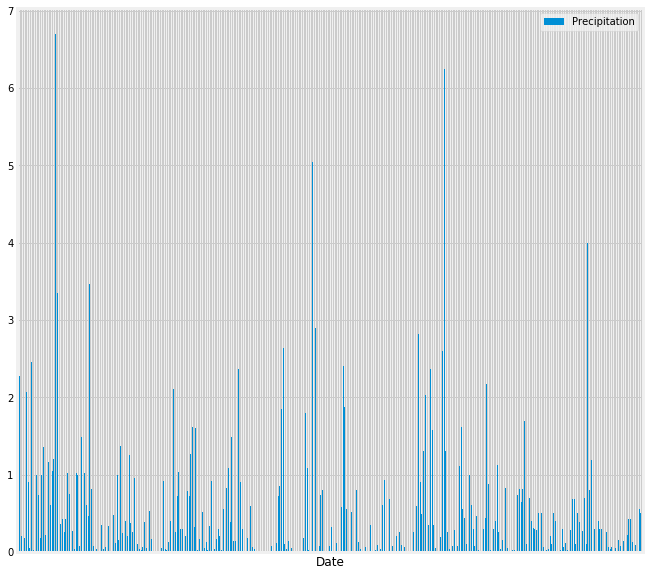

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

prcp_date = [x for x in session.query(Measurement.prcp, Measurement.date)]

last_12_prcp = []
last_12_date = []
for prcp,date in prcp_date:
    if date >= '2016-08-23':
        last_12_prcp.append(prcp)
        last_12_date.append(date)
        
last_12 = pd.DataFrame({'Precipitation':last_12_prcp,'Date':last_12_date})
last_12_byDate = last_12.groupby('Date').max()

last_12_byDate.plot(kind='bar', figsize=(10,10))
plt.xlabel('Date')
plt.tick_params(axis='x',labelbottom=False)

![precipitation](Images/precipitation.png)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_12.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [15]:
# Design a query to show how many stations are available in this dataset?
station_list = [x for x in session.query(Measurement.station)]
station_count = pd.DataFrame({'Station':station_list}).nunique()
station_count

Station    9
dtype: int64

In [16]:
stations = [x for x in session.query(Measurement.station)]
stations_unique = list(dict.fromkeys(stations))
stations_unique

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations = [x for x in session.query(Measurement.station)]
stations_unique = list(dict.fromkeys(stations))

#input station_unique[index]
def stationActivity_counter(station_index):
    count = 0
    for station in stations:
        if station == station_index:
            count += 1
    return count

activity = [stationActivity_counter(station) for station in stations_unique]

station_activity = pd.DataFrame({'Station':stations_unique, 'Activity':activity})
station_activity.sort_values(by=['Activity'], ascending=False).reset_index(drop=True)

,Station,Activity
0,"(USC00519281,)",2772
1,"(USC00519397,)",2724
2,"(USC00513117,)",2709
3,"(USC00519523,)",2669
4,"(USC00516128,)",2612
5,"(USC00514830,)",2202
6,"(USC00511918,)",1979
7,"(USC00517948,)",1372
8,"(USC00518838,)",511


In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station_tobs = [x for x in session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == 'USC00519281')]
stations = [station for station,temp in station_tobs]
temps = [temp for station,temp in station_tobs]
    
station_temp = pd.DataFrame({'Station':stations, 'Temp':temps})
lowest_temp = station_temp.Temp.min()
highest_temp = station_temp.Temp.max()
avg_temp = station_temp.Temp.mean()

[(lowest_temp, highest_temp, avg_temp)]

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

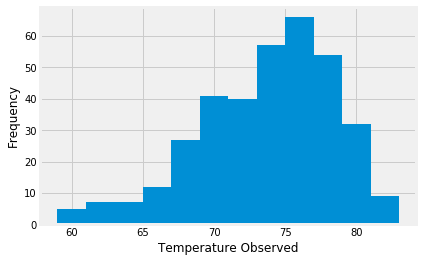

In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_tobs_date = [x for x in session.query(Measurement.station, Measurement.tobs, Measurement.date).\
                        filter(Measurement.station == 'USC00519281').\
                        filter(Measurement.date >= '2016-08-18')]
stations = [station for station,temp,date in station_tobs_date]
temps = [temp for station,temp,date in station_tobs_date]
dates = [date for station,temp,date in station_tobs_date]

stationTempDate = pd.DataFrame({'Station':stations, 'Temp':temps, 'Date':dates})

plt.hist(stationTempDate['Temp'], bins=12, label='temps')
plt.xlabel("Temperature Observed")
plt.ylabel("Frequency")

![precipitation](Images/station-histogram.png)

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [21]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_temps = calc_temps('2017-02-28', '2017-03-05')
tmin = trip_temps[0][0]
tavg = trip_temps[0][1]
tmax = trip_temps[0][2]
print(tmin,tavg,tmax)

64.0 72.02777777777777 78.0


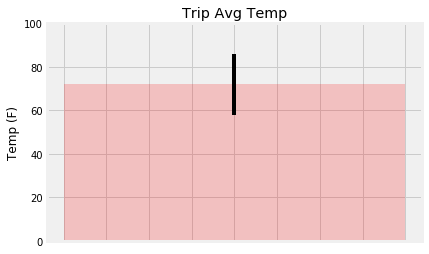

In [22]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x_axis = np.arange(len([tavg]))
temp = [tavg]
error = [tmax-tmin]

plt.bar(x_axis, temp, yerr=error, color='r', alpha=0.2, align="center")
plt.title('Trip Avg Temp')
plt.ylim(0,100)
plt.ylabel('Temp (F)')
plt.tick_params(axis='x',labelbottom=False, length=0)

In [29]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

#see below

In [30]:
#finding prcp data per station
#dates for measurements: 2017-02-28 - 2017-03-05
total_prcp = [x for x in session.query(Measurement.station, func.avg(Measurement.prcp)).\
                filter(Measurement.date >= '2017-02-28').\
                filter(Measurement.date <= '2017-03-05').\
                group_by(Measurement.station).\
                order_by(func.sum(Measurement.prcp).desc()).all()]

station = [station for station, prcp in total_prcp]
prcp_total = [prcp for station, prcp in total_prcp]
prcp_df = pd.DataFrame({'Station':station, 'Prcp Total':prcp_total})

In [31]:
#finding station data
station_data = [x for x in session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).\
                    group_by(Station.station).all()]

station = [station for station, name, lat, long, elev in station_data]
name = [name for station, name, lat, long, elev in station_data]
lat = [lat for station, name, lat, long, elev in station_data]
long = [long for station, name, lat, long, elev in station_data]
elev = [elev for station, name, lat, long, elev in station_data]
station_df = pd.DataFrame({'Station':station, 'Name':name, 'Lat':lat, 'Long':long, 'Elev':elev})

In [32]:
#merging prcp and station data using Station column from both dataframes
total_prcp = pd.merge(prcp_df, station_df, how='inner', on='Station').sort_values(by='Prcp Total', ascending=True).reset_index(drop=True)
total_prcp

,Station,Prcp Total,Name,Lat,Long,Elev
0,USC00519397,0.456667,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00519523,0.464000,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
2,USC00514830,0.580000,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00516128,0.678333,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
4,USC00513117,0.741667,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
5,USC00519281,0.786667,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
6,USC00517948,0.993333,"PEARL CITY, HI US",21.39340,-157.97510,11.9


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
